In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/raw/AEP_hourly.csv")
df.head()


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [4]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index("Datetime", inplace=True)
df.head()


,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [5]:
df.isnull().sum()


AEP_MW    0
dtype: int64

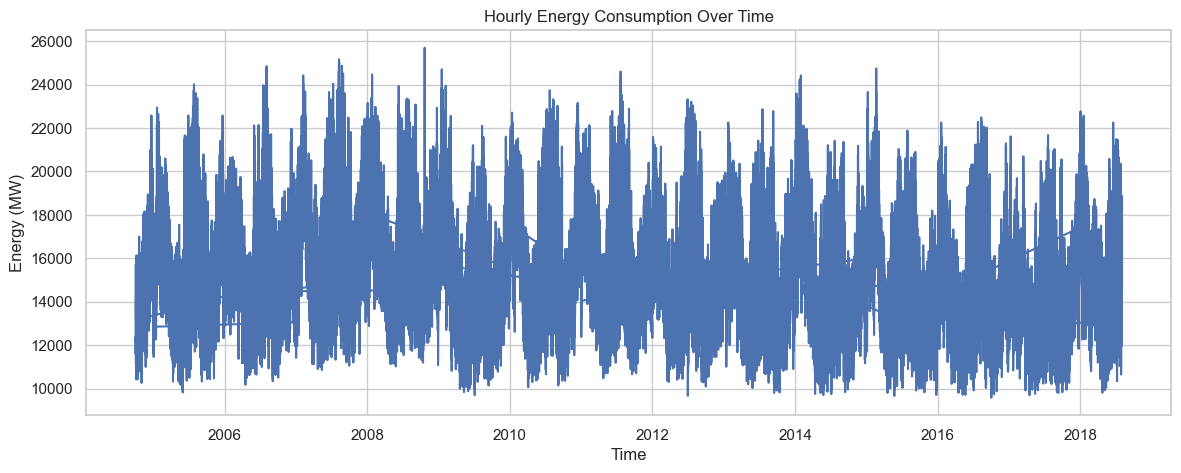

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df.index, df["AEP_MW"])
plt.title("Hourly Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy (MW)")
plt.savefig("../dashboards/screenshots/eda_energy_trend.png")
plt.show()


C:\Users\Sandesh\AppData\Local\Temp\ipykernel_16400\4198567990.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample("M").mean()


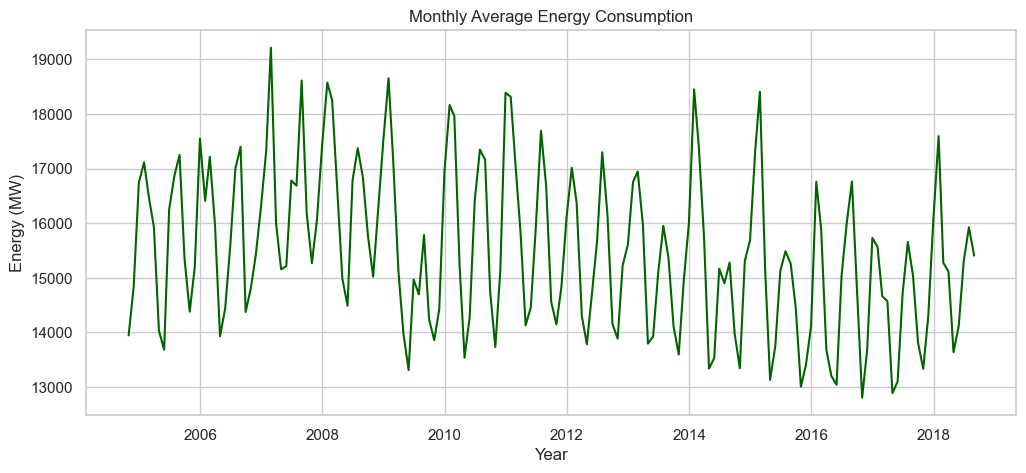

In [16]:
import matplotlib.pyplot as plt

monthly_avg = df.resample("M").mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg["AEP_MW"], color="darkgreen")
plt.title("Monthly Average Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Energy (MW)")
plt.grid(True)

# ✅ SAVE IMAGE HERE
plt.savefig("../dashboards/screenshots/eda_monthly_trend.png",
            dpi=120,
            bbox_inches="tight")

plt.show()


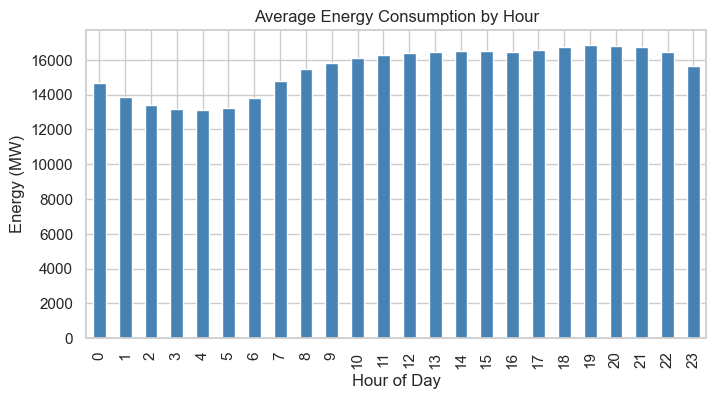

In [15]:
import matplotlib.pyplot as plt

df["hour"] = df.index.hour

hourly_avg = df.groupby("hour")["AEP_MW"].mean()

plt.figure(figsize=(8,4))
hourly_avg.plot(kind="bar", color="steelblue")
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Energy (MW)")

# ✅ SAVE IMAGE HERE
plt.savefig("../dashboards/screenshots/eda_hourly_pattern.png",
            dpi=120,
            bbox_inches="tight")

plt.show()



In [9]:
df.to_csv("../data/processed/clean_energy_data.csv")


In [11]:
import pandas as pd

df = pd.read_csv(
    "../data/processed/feature_engineered_data.csv",
    index_col=0,
    parse_dates=True
)


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("AEP_MW", axis=1)
y = df["AEP_MW"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


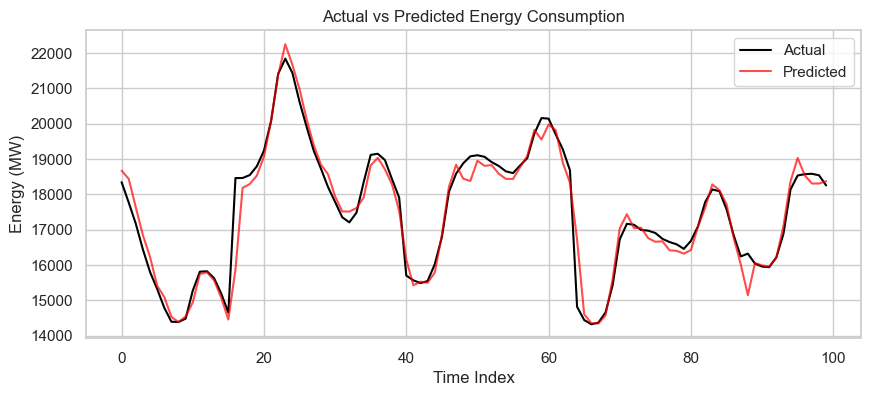

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test.values[:100], label="Actual", color="black")
plt.plot(y_pred_rf[:100], label="Predicted", color="red", alpha=0.7)
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time Index")
plt.ylabel("Energy (MW)")
plt.legend()
plt.grid(True)
plt.savefig("../dashboards/screenshots/model_prediction.png", dpi=120, bbox_inches="tight")
plt.show()
